# The Grubbs' test

## __<font color=blue>Purpose</font>__
---

Grubbs' test is used to detect __a single outlier__ in a dataset that is assumed to be __normally distributed__. You need at least three data points.

If you suspect more than one outlier may be present, it is recommended that you use the generalized extreme studentized deviate (ESD) test as the test can be affected by __masking__. Masking can occur when too few outliers are specified in the test. For example, if you test for a single outlier when there are actually two or more, the additional outliers can influence the test statistic enough that no points are identified as outliers. 

## __<font color=blue>How it works</font>__
---

First, a __null hypothesis ($H_{0}$)__ is defined. In this case, H₀ assumes that there are no outliers in the dataset. The __alternative hypothesis ($H_{a}$)__ is that there is exactly one outlier in the dataset.

Next, we calculate the __Grubbs' test statistic, G__

$$
 G = \frac{max|Y_{i}-\overline{Y}|}{s}
$$

with _$\overline{Y}$_ and _s_ denoting the sample mean and standard deviation, respectively. The Grubbs' test statistic is the largest absolute deviation from the sample mean in units of the sample standard deviation.

This is the __two-sided__ version of the test. The Grubbs' test can also be defined as one of the following __one-sided__ tests:

1. test whether the minimum value is an outlier

    $$
    G = \frac{\overline{Y}-Y_{min}}{s}
    $$

    with _$Y_{min}$_ denoting the minimum value.

2. test whether the maximum value is an outlier

    $$
    G = \frac{Y_{max}-\overline{Y}}{s}
    $$

    with _$Y_{max}$_ denoting the maximum value.

For the two-sided test, the hypothesis of no outliers is rejected if $G > G_{critical}$, the __Grubbs' critical value__

$$
 G_{critical} = \frac{N-1}{\sqrt{N}} \sqrt{\frac{(t_{\alpha/(2N),N-2})^2}{N-2+(t_{\alpha/(2N),N-2})^2}}
$$

with _$t_{\alpha/(2N),N-2}$_ denoting the critical value of the _t_ distribution with (N-2) degrees of freedom and a significance level of α/(2N).

For one-sided tests, we use a significance level of α/N.

## __<font color=blue>Example: one-sided Grubbs' test</font>__
---

In [5]:
# Import the libraries needed

import matplotlib.pyplot as plt   # For creating visualizations and plots
import numpy as np                # For numerical computations and handling arrays
import scipy.stats as stats       # For statistical functions and probability distributions

In [6]:
# Define an example dataset 

# Create a 1D NumPy array with some sample values (our dataset)
y = np.array([0.199, 0.200, 0.200, 0.201, 0.202, 0.203, 0.202, 0.246])

# Create an array with evenly spaced numbers within a given interval (0, 1, 2, ...) to use as the x-axis
# Use np.arange(start (optional, default = 0), stop = len(y), step (optional, default = 1))
x = np.arange(len(y))

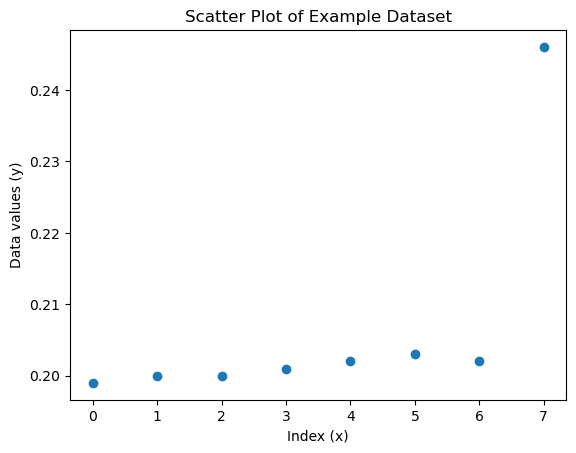

In [7]:
# Visualize the dataset

# Create a scatter plot of the data using x = indices (0, 1, 2, ...) and y = dataset values
plt.scatter(x,y)

# Add labels to the x-axis and y-axis
plt.xlabel("Index (x)")         # Describes what x-values represent
plt.ylabel("Data values (y)")   # Describes what y-values represent

# Add a title to the plot
plt.title("Scatter Plot of Example Dataset")

# Display the plot
plt.show()

Most values are very close together (between 0.199 and 0.203). Then suddenly, there’s a jump to 0.246. This makes it a potential outlier. Let's apply a one-sided Grubbs' test.

- Null hypothesis ($H_{0}$): there are no outliers in the data
- Alternative hypothesis ($H_{a}$): the maximum value is an outlier

The null hypothesis of no outliers is rejected if $G > G_{critical}$ .

In [9]:
# Step 1: Calculate Grubbs' test statistic, G

mean_y = np.mean(y)                   # Mean of the dataset
std_y = np.std(y, ddof=1)             # Sample standard deviation (ddof=1 for sample (N-1), not population (N))
abs_diff = np.abs(y - mean_y)         # Absolute differences of each dataset value from the mean
max_abs_diff = np.max(abs_diff)       # Largest absolute difference from the mean
G_calculated = max_abs_diff / std_y   # Largest deviation divided by sample standard deviation, Grubbs' test statistic G

In [10]:
# Step 2: Calculate the critical value

# Define a function to calculate the Grubbs critical value using sample size and significance level
def calculate_critical_value(size, alpha):
    """
    Calculate the critical value using the formula given in NIST's Grubbs' Test for Outliers 
    
    Arguments:
        size (int): sample size of the dataset (n)
        alpha (float): significance level (commonly 0.05 for 5%)
    
    Returns:
        critical value (float): the critical value for this sample size and significance level
    """
    t_crit = stats.t.ppf(alpha / (2 * size), size - 2)                                            # Critical value for two-tailed test
    critical_value = ((size - 1) / np.sqrt(size)) * np.sqrt(t_crit**2 / (size - 2 + t_crit**2))   # Formula for Grubbs' critical value
    
    return critical_value

# Calculate and display the Grubbs critical value for dataset y at 5% significance
# As the function above is for a two-tailed test and we are performing a one-tailed test, we need a signifinace level of 10%.
G_critical = calculate_critical_value(len(y), 0.1)

In [11]:
# Step 3: Compare and interpret results

# Print the Grubbs' test statistic (G_calculated) and the Grubbs' critical value (G_critical) rounded to 3 decimal places ({:.3f})
# Use format() to embed variables directly in a string
print("Grubbs' test statistic (G): {:.3f}".format(G_calculated))
print("Grubbs' critical value (G_critical): {:.3f}".format(G_critical))

# Compare the Grubbs' test statistic with the critical value
if G_calculated > G_critical:
    # If the calculated value is larger than the critical value, the extreme point is an outlier
    print("Reject the null hypothesis. An outlier is detected.")
else:
    # If the calculated value is smaller or equal, no significant outlier is detected
    print("Accept the null hypothesis. No outlier detected.")

Grubbs' test statistic (G): 2.467
Grubbs' critical value (G_critical): 2.032
Reject the null hypothesis. An outlier is detected.


## __<font color=blue>Resources</font>__
---

- Grubbs, F. E. (1969). Procedures for Detecting Outlying Observations in Samples. Technometrics, 11(1), 1–21. Available [here](https://doi.org/10.1080/00401706.1969.10490657).
- National Institute of Standards and Technology (NIST), Grubbs' Test for Outliers. Available [here](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h1.htm).
- Bhavesh Bhatt, Grubbs' Test for Outlier Detection using Python. Available [here](https://www.youtube.com/watch?v=Hn_lMUaMcak).
- GraphPad, Detecting outliers with Grubbs' test. Available [here](https://www.graphpad.com/support/faq/detecting-outliers-with-grubbs-test/).